## Business Recommendations
- We found that Overall Quality rating of the property is most influential when determining price, followed by the above ground living area and garage size. 
- We found that the exterior quality was fair, that badly affected the value of the home and we could also see this trend with a similarly bad  quality rating of the kitchen and basement.
- The neighborhoods that seem to command higher sale prices were Stone Brook, Northridge, Northridge Heights and Green hills.
- If this model were applied to other cities, the ordinal columns that reflect the quality and condition of the property should be standardised and using a similar scale. The neighborhoods that are present in the features should be dropped as it would be irrelevant to modelling other cities. There might be differing preferences of local buyers depending on the weather and demographics of the city which will impact what is a 'desirable' property.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV ,Lasso, LassoCV, ElasticNet, ElasticNetCV

%matplotlib inline

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv('../datasets/train_df.csv', index_col=0)
test_df = pd.read_csv('../datasets/test_df.csv', index_col=0)

In [3]:
pd.options.display.max_rows = 200

In [4]:
pd.options.display.max_info_rows = 200

In [5]:
pd.options.display.max_columns = 200

In [6]:
pd.options.display.max_info_columns = 200

In [7]:
train_df.shape

(2049, 81)

In [8]:
test_df.shape

(879, 80)

In [9]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,55.228571,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   PID              int64  
 2   MS SubClass      int64  
 3   MS Zoning        object 
 4   Lot Frontage     float64
 5   Lot Area         int64  
 6   Street           object 
 7   Alley            object 
 8   Lot Shape        object 
 9   Land Contour     object 
 10  Utilities        object 
 11  Lot Config       object 
 12  Land Slope       object 
 13  Neighborhood     object 
 14  Condition 1      object 
 15  Condition 2      object 
 16  Bldg Type        object 
 17  House Style      object 
 18  Overall Qual     int64  
 19  Overall Cond     int64  
 20  Year Built       int64  
 21  Year Remod/Add   int64  
 22  Roof Style       object 
 23  Roof Matl        object 
 24  Exterior 1st     object 
 25  Exterior 2nd     object 
 26  Mas Vnr Type     object 
 27  Mas Vnr Area     f

Decided to only one hot encode features in my shortlist for categorical columns where I have since seen noticeable variance among the options when measured against the target variable, 'SalePrice.

Ended up dropping Condition 2 since it had a small sample size and quite a number of null/NA values.  

And when considering numerical columns, we can add 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF ' to our initial shortlist for features. 'Mas Vnr Area' has too many null values for it to be used as a reliable predictor.

In [12]:
cat_features_encoded = train_df[['Land Contour', 
                               'Neighborhood', 
                               'Condition 1',
                               'Bsmt Qual',
                               'Bsmt Exposure',
                               'Kitchen Qual',
                               'Functional',
                               'Fireplace Qu', 
                               'Overall Qual',
                               'Garage Cars',
                               'Bsmt Full Bath',
                               'Full Bath',
                               'TotRms AbvGrd',
                               'Exter Qual',
                               'Exter Cond']]
cat_features_encoded.head()

,Land Contour,Neighborhood,Condition 1,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Functional,Fireplace Qu,Overall Qual,Garage Cars,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Exter Qual,Exter Cond
0,Lvl,Sawyer,RRAe,TA,No,Gd,Typ,NaN,6,2,0,2,6,Gd,TA
1,Lvl,SawyerW,Norm,Gd,No,Gd,Typ,TA,7,2,1,2,8,Gd,TA
2,Lvl,NAmes,Norm,TA,No,Gd,Typ,NaN,5,1,1,1,5,TA,Gd
3,Lvl,Timber,Norm,Gd,No,TA,Typ,NaN,5,2,0,2,7,TA,TA
4,Lvl,SawyerW,Norm,Fa,No,TA,Typ,NaN,6,2,0,2,6,TA,TA


In [13]:
cat_features_encoded_test = test_df[['Land Contour', 
                               'Neighborhood', 
                               'Condition 1',
                               'Bsmt Qual',
                               'Bsmt Exposure',
                               'Kitchen Qual',
                               'Functional',
                               'Fireplace Qu', 
                               'Overall Qual',
                               'Garage Cars',
                               'Bsmt Full Bath',
                               'Full Bath',
                               'TotRms AbvGrd',
                               'Exter Qual',
                               'Exter Cond']]
cat_features_encoded_test.head()

,Land Contour,Neighborhood,Condition 1,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Functional,Fireplace Qu,Overall Qual,Garage Cars,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Exter Qual,Exter Cond
0,Lvl,OldTown,Norm,Fa,No,Fa,Typ,NaN,6,1,0,2,9,TA,Fa
1,Lvl,Sawyer,Norm,Gd,No,TA,Typ,NaN,5,2,0,2,10,TA,TA
2,Lvl,Gilbert,Norm,Gd,Av,Gd,Typ,Gd,7,2,1,2,7,Gd,TA
3,Lvl,OldTown,Norm,TA,No,TA,Typ,NaN,5,2,0,1,5,Gd,TA
4,Lvl,NAmes,Norm,Gd,No,TA,Typ,Gd,6,2,1,1,6,TA,TA


In [14]:
cat_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Land Contour    object
 1   Neighborhood    object
 2   Condition 1     object
 3   Bsmt Qual       object
 4   Bsmt Exposure   object
 5   Kitchen Qual    object
 6   Functional      object
 7   Fireplace Qu    object
 8   Overall Qual    int64 
 9   Garage Cars     int64 
 10  Bsmt Full Bath  int64 
 11  Full Bath       int64 
 12  TotRms AbvGrd   int64 
 13  Exter Qual      object
 14  Exter Cond      object
dtypes: int64(5), object(10)
memory usage: 256.1+ KB


In [15]:
cat_features_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Land Contour    object
 1   Neighborhood    object
 2   Condition 1     object
 3   Bsmt Qual       object
 4   Bsmt Exposure   object
 5   Kitchen Qual    object
 6   Functional      object
 7   Fireplace Qu    object
 8   Overall Qual    int64 
 9   Garage Cars     int64 
 10  Bsmt Full Bath  int64 
 11  Full Bath       int64 
 12  TotRms AbvGrd   int64 
 13  Exter Qual      object
 14  Exter Cond      object
dtypes: int64(5), object(10)
memory usage: 109.9+ KB


In [16]:
cat_features_encoded = pd.get_dummies(cat_features_encoded)

In [17]:
cat_features_encoded_test = pd.get_dummies(cat_features_encoded_test)

In [18]:
cat_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column                Dtype
---  ------                -----
 0   Overall Qual          int64
 1   Garage Cars           int64
 2   Bsmt Full Bath        int64
 3   Full Bath             int64
 4   TotRms AbvGrd         int64
 5   Land Contour_Bnk      uint8
 6   Land Contour_HLS      uint8
 7   Land Contour_Low      uint8
 8   Land Contour_Lvl      uint8
 9   Neighborhood_Blmngtn  uint8
 10  Neighborhood_Blueste  uint8
 11  Neighborhood_BrDale   uint8
 12  Neighborhood_BrkSide  uint8
 13  Neighborhood_ClearCr  uint8
 14  Neighborhood_CollgCr  uint8
 15  Neighborhood_Crawfor  uint8
 16  Neighborhood_Edwards  uint8
 17  Neighborhood_Gilbert  uint8
 18  Neighborhood_Greens   uint8
 19  Neighborhood_GrnHill  uint8
 20  Neighborhood_IDOTRR   uint8
 21  Neighborhood_Landmrk  uint8
 22  Neighborhood_MeadowV  uint8
 23  Neighborhood_Mitchel  uint8
 24  Neighborhood_NAmes    uint8
 2

In [19]:
cat_features_encoded.corr('spearman')

,Overall Qual,Garage Cars,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
Overall Qual,1.000000,0.601459,0.156788,0.549825,0.373280,-0.082951,0.154590,-0.025737,-0.036653,0.093999,0.024421,-0.015721,-0.121300,-0.000849,0.142322,0.026591,-0.205997,0.084311,0.053028,0.024851,-0.183896,-0.000364,-0.136524,-0.074421,-0.254467,0.020326,0.059510,0.195780,0.343222,-0.183966,-0.043195,-0.199119,0.058248,0.256687,0.203825,0.120541,0.080693,-0.110655,-0.135134,0.125476,0.036239,0.055399,-0.056009,0.019239,-0.012436,0.027957,0.423288,-0.179544,0.392675,-0.034581,-0.505476,0.124223,0.264993,0.024269,-0.200822,0.374221,-0.176709,0.461941,-0.593984,0.004681,-0.067368,-0.098981,-0.104007,-0.095576,-0.052139,-0.014970,0.183669,0.156913,-0.014179,0.344670,-0.066351,0.145480,0.323176,-0.147218,0.594659,-0.672200,0.023238,-0.158185,-0.103838,-0.054670,0.165793
Garage Cars,0.601459,1.000000,0.169010,0.518843,0.402418,-0.097765,0.091536,0.006953,-0.001035,0.078652,0.018266,-0.105257,-0.146547,-0.003604,0.128350,-0.038498,-0.196984,0.101983,0.012906,-0.038150,-0.195999,0.007448,-0.123571,0.043561,-0.170963,0.005688,0.073599,0.192059,0.318306,-0.160427,-0.134829,-0.096806,0.051363,0.169246,0.122353,0.114986,0.052029,-0.102639,-0.085830,0.079954,0.032709,0.052742,-0.006333,0.008545,-0.006974,0.027924,0.377661,-0.116549,0.323572,-0.026970,-0.476620,0.135652,0.222528,0.032738,-0.233741,0.298875,-0.179477,0.320932,-0.416010,0.015108,-0.081448,-0.018464,-0.034148,-0.034395,-0.013807,-0.023139,0.065363,0.141610,0.006609,0.243665,-0.041568,0.151056,0.259220,-0.133048,0.431314,-0.491438,-0.000330,-0.142641,-0.095706,-0.023139,0.152620
Bsmt Full Bath,0.156788,0.169010,1.000000,-0.022583,-0.061031,-0.038844,0.042832,0.110271,-0.055704,-0.030527,-0.009321,-0.040365,-0.093632,0.052072,0.041019,-0.012595,0.000510,-0.082899,0.044390,0.005027,-0.106223,-0.018509,-0.000609,0.068099,0.032543,-0.055127,-0.012052,0.089341,0.105688,-0.154703,-0.019044,0.046747,0.015372,-0.014116,0.072672,0.059820,0.061306,-0.037257,0.012168,-0.005090,0.012343,0.022856,0.050232,-0.023001,-0.006586,0.008715,0.200261,-0.076117,0.078723,-0.018509,-0.122722,0.125809,0.241882,0.050585,-0.226277,0.157911,-0.069753,0.057550,-0.117871,0.017688,-0.015638,0.026142,-0.011126,-0.026109,-0.026182,-0.026182,0.008654,0.047876,0.082104,0.059342,-0.015995,0.049757,0.129339,-0.077546,0.088748,-0.119948,-0.015638,-0.051894,0.029695,-0.026182,0.001642
Full Bath,0.549825,0.518843,-0.022583,1.000000,0.534696,-0.086587,0.071273,-0.057946,0.035977,0.073414,-0.024615,-0.086523,-0.153736,0.014551,0.118555,-0.014452,-0.119577,0.188172,-0.042025,-0.004144,-0.113335,0.018391,-0.084464,-0.014025,-0.275256,0.065745,0.12322

In [20]:
#dropping ordinal columns that already exists in train dataset
cat_features_encoded.drop(['Overall Qual',
                           'Garage Cars',
                           'Full Bath',
                          'TotRms AbvGrd',
                          'Bsmt Full Bath'], axis=1, inplace=True)

In [21]:
cat_features_encoded_test.drop(['Overall Qual',
                           'Garage Cars',
                           'Full Bath',
                          'TotRms AbvGrd',
                          'Bsmt Full Bath'], axis=1, inplace=True)

In [22]:
#joining the dummies with training dataset for analysis. should end up with 145 columns
train_df = pd.concat([train_df, cat_features_encoded], axis=1)

In [23]:
test_df = pd.concat([test_df, cat_features_encoded_test], axis=1)

In [24]:
train_df.shape

(2049, 157)

In [25]:
test_df.shape

(879, 153)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 157 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Id                    int64  
 1   PID                   int64  
 2   MS SubClass           int64  
 3   MS Zoning             object 
 4   Lot Frontage          float64
 5   Lot Area              int64  
 6   Street                object 
 7   Alley                 object 
 8   Lot Shape             object 
 9   Land Contour          object 
 10  Utilities             object 
 11  Lot Config            object 
 12  Land Slope            object 
 13  Neighborhood          object 
 14  Condition 1           object 
 15  Condition 2           object 
 16  Bldg Type             object 
 17  House Style           object 
 18  Overall Qual          int64  
 19  Overall Cond          int64  
 20  Year Built            int64  
 21  Year Remod/Add        int64  
 22  Roof Style            object 
 23  Roof Matl   

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 153 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Id                    int64  
 1   PID                   int64  
 2   MS SubClass           int64  
 3   MS Zoning             object 
 4   Lot Frontage          float64
 5   Lot Area              int64  
 6   Street                object 
 7   Alley                 object 
 8   Lot Shape             object 
 9   Land Contour          object 
 10  Utilities             object 
 11  Lot Config            object 
 12  Land Slope            object 
 13  Neighborhood          object 
 14  Condition 1           object 
 15  Condition 2           object 
 16  Bldg Type             object 
 17  House Style           object 
 18  Overall Qual          int64  
 19  Overall Cond          int64  
 20  Year Built            int64  
 21  Year Remod/Add        int64  
 22  Roof Style            object 
 23  Roof Matl     

In [28]:
train_df.drop(['Land Contour', 
               'Neighborhood',
               'Condition 1',
               'Bsmt Qual',
               'Bsmt Exposure',
               'Kitchen Qual',
               'Functional',
               'Fireplace Qu',
               'Exter Qual',
               'Exter Cond'], axis=1, inplace=True)

In [29]:
test_df.drop(['Land Contour', 
               'Neighborhood',
               'Condition 1',
               'Bsmt Qual',
               'Bsmt Exposure',
               'Kitchen Qual',
               'Functional',
               'Fireplace Qu',
               'Exter Qual',
               'Exter Cond'], axis=1, inplace=True)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 147 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Id                    int64  
 1   PID                   int64  
 2   MS SubClass           int64  
 3   MS Zoning             object 
 4   Lot Frontage          float64
 5   Lot Area              int64  
 6   Street                object 
 7   Alley                 object 
 8   Lot Shape             object 
 9   Utilities             object 
 10  Lot Config            object 
 11  Land Slope            object 
 12  Condition 2           object 
 13  Bldg Type             object 
 14  House Style           object 
 15  Overall Qual          int64  
 16  Overall Cond          int64  
 17  Year Built            int64  
 18  Year Remod/Add        int64  
 19  Roof Style            object 
 20  Roof Matl             object 
 21  Exterior 1st          object 
 22  Exterior 2nd          object 
 23  Mas Vnr Type

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 143 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Id                    int64  
 1   PID                   int64  
 2   MS SubClass           int64  
 3   MS Zoning             object 
 4   Lot Frontage          float64
 5   Lot Area              int64  
 6   Street                object 
 7   Alley                 object 
 8   Lot Shape             object 
 9   Utilities             object 
 10  Lot Config            object 
 11  Land Slope            object 
 12  Condition 2           object 
 13  Bldg Type             object 
 14  House Style           object 
 15  Overall Qual          int64  
 16  Overall Cond          int64  
 17  Year Built            int64  
 18  Year Remod/Add        int64  
 19  Roof Style            object 
 20  Roof Matl             object 
 21  Exterior 1st          object 
 22  Exterior 2nd          object 
 23  Mas Vnr Type  

In [32]:
#figuring out the difference between the two datasets and dropping columns that exist in only one dataset
train_df.columns.difference(test_df.columns)

Index(['Functional_Sal', 'Functional_Sev', 'Neighborhood_GrnHill',
       'Neighborhood_Landmrk', 'SalePrice'],
      dtype='object')

In [33]:
train_df.drop(['Functional_Sal', 
               'Functional_Sev', 
               'Neighborhood_GrnHill',
               'Neighborhood_Landmrk'], axis=1, inplace=True)

In [34]:
test_df.columns.difference(train_df.columns)

Index(['Kitchen Qual_Po'], dtype='object')

In [35]:
test_df.drop(['Kitchen Qual_Po'], axis=1, inplace=True)

In [36]:
train_df.shape

(2049, 143)

In [37]:
test_df.shape

(879, 142)

In [38]:
corr = train_df.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
Overall Qual            0.800028
Gr Liv Area             0.697032
Garage Area             0.650097
Garage Cars             0.648007
Total Bsmt SF           0.628894
1st Flr SF              0.618345
Bsmt Qual_Ex            0.586529
Year Built              0.571726
Kitchen Qual_Ex         0.551320
Year Remod/Add          0.550142
Full Bath               0.537913
TotRms AbvGrd           0.503509
Mas Vnr Area            0.503417
Exter Qual_Ex           0.493924
Fireplaces              0.470740
Neighborhood_NridgHt    0.448654
Exter Qual_Gd           0.446408
BsmtFin SF 1            0.423583
Fireplace Qu_Gd         0.384488
Bsmt Exposure_Gd        0.376948
Open Porch SF           0.333123
Wood Deck SF            0.326365
Lot Frontage            0.320593
Kitchen Qual_Gd         0.306272
Lot Area                0.296312
Bsmt Full Bath          0.282880
Half Bath               0.282595
Neighborhood_NoRidge    0.263389
Garage Yr Blt           0.259166
Neighborho

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa02880f710>]],
      dtype=object)

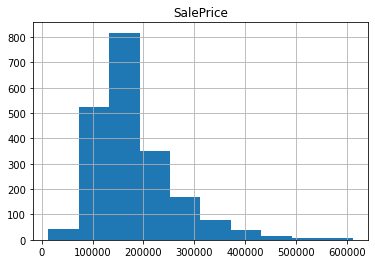

In [39]:
train_df.hist(column='SalePrice')

## Feature Engineering

In [40]:
features = ['Overall Qual',
            'Gr Liv Area', 
            'Garage Area', 
            'Garage Cars',
            'Total Bsmt SF',
            '1st Flr SF',
            'Bsmt Qual_Ex',
            'Year Built',
            'Kitchen Qual_Ex',
            'Year Remod/Add',
            'Full Bath',
            'TotRms AbvGrd',
            'Exter Qual_Ex',
            'Fireplaces',
            'Neighborhood_NridgHt',
            'Exter Qual_Gd',
            'Bsmt Qual_TA',
            'Kitchen Qual_TA',
            'Exter Qual_TA']

After confirming the correlation of variables against Sale Price, we can confirm our first features with greater certainty. 

Features shortlist for categorical:

'Lot Contour' 'Condition 1' 'Condition 2' 'Roof Matl' 'Functional' 'Fireplace Qu''Bsmt Full Bath' 'Exter Cond' - ( all dropped entirely as it did not have the expected impact on SalesPrice)

Features that made the cut:

'Neighborhood' - selected neighborhood based on correlation to sale price

'Kitchen Qual' - double edged sword, positive effect on sale price if you get a good rating, negative effect on sale price if you got a bad rating for your property.

'Overall Qual' 

'Garage Cars' 

'Full Bath' 

'TotRms AbvGrd' 

'Exter Qual' 


'Year Built'

'Bsmt Qual'

New features that were added based on corr score with Sale Price:
'Garage Area'
'1st Flr SF'
'Year Remod/Add'

In [41]:
train_df[features].isnull().sum()

Overall Qual            0
Gr Liv Area             0
Garage Area             0
Garage Cars             0
Total Bsmt SF           0
1st Flr SF              0
Bsmt Qual_Ex            0
Year Built              0
Kitchen Qual_Ex         0
Year Remod/Add          0
Full Bath               0
TotRms AbvGrd           0
Exter Qual_Ex           0
Fireplaces              0
Neighborhood_NridgHt    0
Exter Qual_Gd           0
Bsmt Qual_TA            0
Kitchen Qual_TA         0
Exter Qual_TA           0
dtype: int64

In [42]:
target = train_df['SalePrice']

## Modeling

In [43]:
#Create features matrix (x) and target vector (y)
X = train_df[features]
y = target
X.shape

(2049, 19)

In [44]:
y.shape

(2049,)

In [45]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [46]:
#scaling for regularization
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [47]:
X_train_sc.shape

(1536, 19)

In [48]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train_sc, y_train, cv=5, scoring='r2')
    print('CV mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [49]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8,5))
    plt.plot(y_test, y_pred, 'o')
    plt.ylabel('predicted')
    plt.xlabel('real')
    plt.show()
    

In [50]:
#fitting our model
lr = LinearRegression().fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(lr)

RSME:  29873.67623803569
CV mean:  0.8131762064893133
STD:  0.04648479338185689




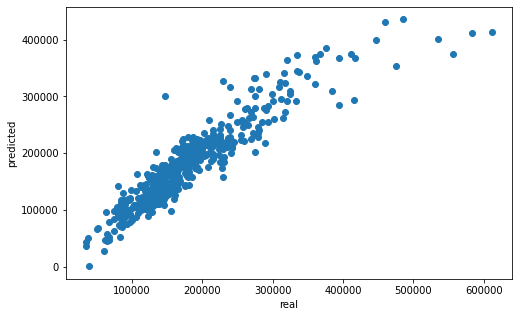

In [51]:
plot_predictions(y_test, y_pred)

In [52]:
#using ridge regularization
ridge = Ridge(alpha=1).fit(X_train_sc, y_train)
y_pred = ridge.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(ridge)

RSME:  29871.516641370992
CV mean:  0.8132497165550282
STD:  0.04637002614792772




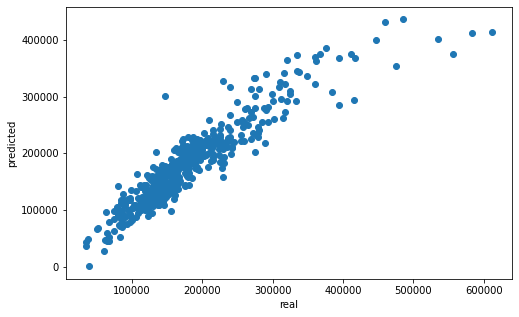

In [53]:
plot_predictions(y_test, y_pred)

In [54]:
#find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score:  0.8161555153083018
Best Params:  {'alpha': 100}


[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.0s finished


In [55]:
#using lasso regularization
lasso = Lasso(alpha=1).fit(X_train_sc, y_train)
y_pred = lasso.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(lasso)

RSME:  29873.159318773578
CV mean:  0.8131855781645021
STD:  0.04647270907223611




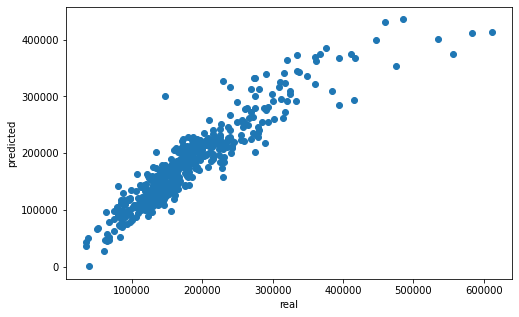

In [56]:
plot_predictions(y_test, y_pred)

In [57]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.8156384377727587
Best Params:  {'alpha': 1000}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [58]:
#number of coefficients that end up being reduced to zero

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha[i] for i in range(0,5)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0.001    0
alpha_0.01     0
alpha_0.1      0
alpha_1        0
alpha_10       0
dtype: int64

In [59]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
Overall Qual            0.800028
Gr Liv Area             0.697032
Garage Area             0.650097
Garage Cars             0.648007
Total Bsmt SF           0.628894
1st Flr SF              0.618345
Bsmt Qual_Ex            0.586529
Year Built              0.571726
Kitchen Qual_Ex         0.551320
Year Remod/Add          0.550142
Full Bath               0.537913
TotRms AbvGrd           0.503509
Mas Vnr Area            0.503417
Exter Qual_Ex           0.493924
Fireplaces              0.470740
Neighborhood_NridgHt    0.448654
Exter Qual_Gd           0.446408
BsmtFin SF 1            0.423583
Fireplace Qu_Gd         0.384488
Bsmt Exposure_Gd        0.376948
Open Porch SF           0.333123
Wood Deck SF            0.326365
Lot Frontage            0.320593
Kitchen Qual_Gd         0.306272
Lot Area                0.296312
Bsmt Full Bath          0.282880
Half Bath               0.282595
Neighborhood_NoRidge    0.263389
Garage Yr Blt           0.259166
Neighborho

In [60]:
#let's change the features to include those with 40% or more positive or negative correlation with price
features_40pct_corr = []
for key, value in corr['SalePrice'].items():
    if ((value>=0.40) & (value<0.9)) | (value<=-0.40):
        features_40pct_corr.append(key)
features_40pct_corr
    

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Neighborhood_NridgHt',
 'Bsmt Qual_Ex',
 'Bsmt Qual_TA',
 'Kitchen Qual_Ex',
 'Kitchen Qual_TA',
 'Exter Qual_Ex',
 'Exter Qual_Gd',
 'Exter Qual_TA']

In [61]:
train_df[features_40pct_corr].isnull().sum()

Overall Qual            0
Year Built              0
Year Remod/Add          0
Mas Vnr Area            0
BsmtFin SF 1            0
Total Bsmt SF           0
1st Flr SF              0
Gr Liv Area             0
Full Bath               0
TotRms AbvGrd           0
Fireplaces              0
Garage Cars             0
Garage Area             0
Neighborhood_NridgHt    0
Bsmt Qual_Ex            0
Bsmt Qual_TA            0
Kitchen Qual_Ex         0
Kitchen Qual_TA         0
Exter Qual_Ex           0
Exter Qual_Gd           0
Exter Qual_TA           0
dtype: int64

In [62]:
train_df.shape

(2049, 143)

In [63]:
X = train_df[features_40pct_corr]
y = target
X.shape

(2049, 21)

In [64]:
y.shape

(2049,)

In [65]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
X_train_sc.shape

(1536, 21)

In [66]:
lr = LinearRegression().fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(lr)

RSME:  27568.475299649708
CV mean:  0.8250116417507378
STD:  0.048765804722301596




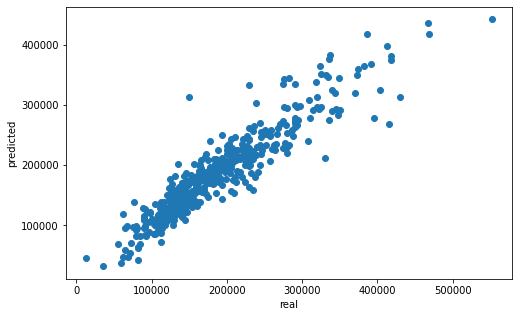

In [67]:
plot_predictions(y_test, y_pred)

In [68]:
ridge = Ridge(alpha=1).fit(X_train_sc, y_train)
y_pred = ridge.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(ridge)

RSME:  27569.94147993162
CV mean:  0.8250538629304234
STD:  0.04871418087425785




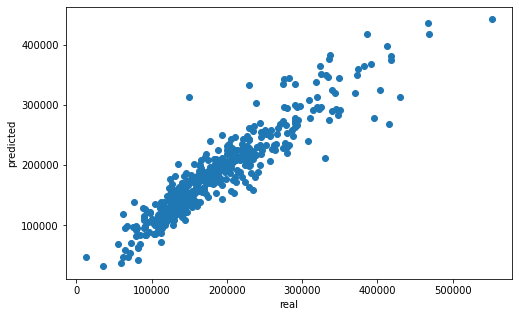

In [69]:
plot_predictions(y_test, y_pred)

In [70]:
#find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.8263974089077571
Best Params:  {'alpha': 100}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [71]:
lasso = Lasso(alpha=1).fit(X_train_sc, y_train)
y_pred = lasso.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(lasso)

RSME:  27568.540397421733
CV mean:  0.8250167715612851
STD:  0.04876511927033562




In [72]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score:  0.8254218876029743
Best Params:  {'alpha': 1000}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [73]:
#number of coefficients that end up being reduced to zero

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha[i] for i in range(0,5)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0.001    0
alpha_0.01     0
alpha_0.1      0
alpha_1        0
alpha_10       0
dtype: int64

In [74]:
lasso = Lasso(alpha=0.01).fit(X_train_sc, y_train)
y_pred = lasso.predict(X_test_sc)
print('RSME: ', np.sqrt(mean_squared_error(y_test, y_pred)))
get_cv_scores(lasso)

RSME:  27568.475919669047
CV mean:  0.8250116933173569
STD:  0.048765797938219245




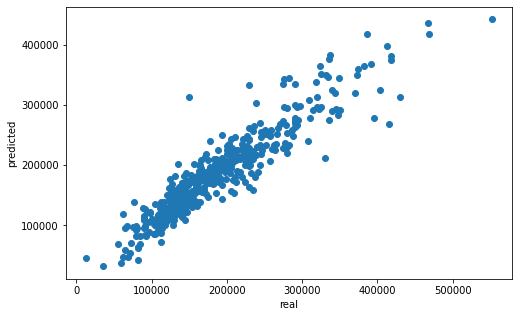

In [75]:
plot_predictions(y_test, y_pred)

In [85]:
#making predictions on test dataset
test_X = test_df[features_40pct_corr]
test_X_sc = ss.fit_transform(test_X)
predicted_prices = lasso.predict(test_X_sc)
#predicted_prices = ss.inverse_transform(predicted_prices)
print(predicted_prices)

[148910.67564997 174647.0835814  208289.04448592 125083.9008567
 181746.89741079  98766.56627676 105554.78215786 135983.0011272
 196019.73382266 177272.5400983  170563.42429209 127674.42146957
 152973.35341392 307929.52181639 160295.26925276 138265.03026335
 170887.0621666  110424.89713728 202218.82998541 198511.53002091
 139126.71565521 121100.48538659 199435.63823721 162772.9035638
 190465.61626181 109718.97129502 132978.07012407 160340.0695358
 151932.75003316  51046.61004267  98472.15507842 100375.13299213
 243161.41692482 164451.39934088 214178.29772469 181096.38503033
 135628.12101684  86158.59677165 129300.76983432 192291.20961847
 169202.39353798 219123.01328682 154716.52237458 166430.26806023
 229924.48157532 112927.00348658 222577.89570144 114106.42792872
 112074.10567087 118140.57185495 106960.44679643 208290.28657149
 247432.25308898 126156.65240401 108821.39036245 153259.43631507
 156409.27398642 143582.88211977 174498.38680552 237682.8355669
 285083.89613001 126996.322649

In [86]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('../datasets/submission.csv', index=False)

In [87]:
test_df.shape

(879, 142)